<a href="https://colab.research.google.com/github/NWemphy/MachineLearningB_/blob/main/UTS2_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Norbertus Wempy Junior Keraf**

**Nim  : 225314043**

**UTS2 Pembelajaran Mesin Kelas BP**

**Import library yang dibutuhkan**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Unzip File dataset dari GDrive**
**Link : Maternal health : https://archive.ics.uci.edu/dataset/863/maternal+health+risk**

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/maternal+health+risk.zip"
extract_dir = "/content/maternal_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

***Langkah 1 : Load Data***

**Baca Dataset**

In [ ]:
df = pd.read_csv("/content/maternal_data/Maternal Health Risk Data Set.csv")

***Langkah 2 : Tahap Preproccesing Data***

**Encode Label dan Target Fitur**

In [ ]:
# Karena targetnya masih teks, saya ubah ke angka supaya komputer bisa memproses
le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])

# Pisahin fitur sama target biar gampang diolah
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']

**Normalisasi data menggunakan scaler**

In [ ]:
# Melakukan standardisasi fitur agar setiap variabel memiliki rentang nilai yang seragam,
# sehingga model tidak terpengaruh oleh skala yang berbeda-beda pada fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Split data menjadi train dan test dengan masing masing holdout 80/20**

In [ ]:
# Bagi data buat training sama testing, test 20% (untuk mengecek performa nanti)
# Stratify biar kelasnya seimbang, tidak ada yang numpuk
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

**Binary y_test untuk banyak kelas AUC (Area Under the Curve)**

In [ ]:
# Buat AUC multiclass, target test saya ubah ke biner dulu
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

***Langkah 3 : Tahap Pendefenisian Model***

In [ ]:
# Sesuai soal UTS, saya menyiapkan beberapa model, agar bisa dibandingkan model mana yang paling akurat
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "ANN": MLPClassifier(max_iter=500, random_state=42)
}
# Melakukan cross-validation untuk mendapatkan evaluasi performa model yang lebih stabil dan dapat dipercaya
# Menggunakan StratifiedKFold supaya proporsi kelas di setiap fold tetap seimbang
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

***Langkah 4 : Performance (Evaluasi)***

**Import library Cross Validation Score**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
for name, model in models.items():
    print("=" * 60)
    print(f"MODEL: {name}")

    # mengecek terlebih dahulu performa model menggunakan cross-validation di data train
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"Cross-Val Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Latih model dengan semua data training, lalu evaluasi hasilnya menggunakan data test yang belum pernah digunakan saat pelatihan
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Evaluasi hasilnya menggunakan confusion matrix agar terlihat kelas mana yang sering salah
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Laporan lengkap dari performa tiap kelas, kayak precision, recall, f1-score
    print("\nClassification Report:")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Hitung AUC multiclass, agar tau seberapa model pintar dalam mengklasifikasi tiap kelas
    auc_score = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
    print(f"AUC Score (holdout): {auc_score:.4f}")

MODEL: Random Forest
Cross-Val Accuracy: 0.8274 ± 0.0150

Confusion Matrix:
[[52  1  2]
 [ 0 65 16]
 [ 2  7 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.89      0.80      0.84        81
           2       0.76      0.87      0.81        67

    accuracy                           0.86       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.86      0.86       203

AUC Score (holdout): 0.9606
MODEL: SVM
Cross-Val Accuracy: 0.6930 ± 0.0295

Confusion Matrix:
[[48  4  3]
 [ 0 73  8]
 [ 2 39 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        55
           1       0.63      0.90      0.74        81
           2       0.70      0.39      0.50        67

    accuracy                           0.72       203
   macro avg       0.76      0.72      0.72       203
w

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-Val Accuracy: 0.7053 ± 0.0169

Confusion Matrix:
[[47  4  4]
 [ 1 69 11]
 [ 4 36 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        55
           1       0.63      0.85      0.73        81
           2       0.64      0.40      0.50        67

    accuracy                           0.70       203
   macro avg       0.73      0.70      0.70       203
weighted avg       0.71      0.70      0.69       203

AUC Score (holdout): 0.8465


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MODEL: Random Forest
Cross-Val Accuracy: 0.8274 ± 0.0150

Confusion Matrix:
[[52  1  2]
 [ 0 65 16]
 [ 2  7 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.89      0.80      0.84        81
           2       0.76      0.87      0.81        67

    accuracy                           0.86       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.86      0.86       203

AUC Score (holdout): 0.9606


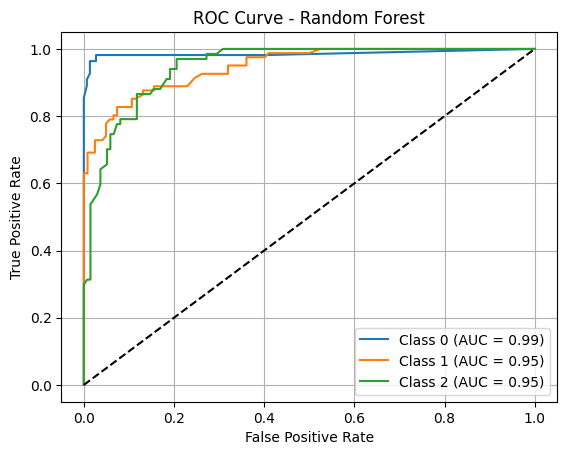

MODEL: SVM
Cross-Val Accuracy: 0.6930 ± 0.0295

Confusion Matrix:
[[48  4  3]
 [ 0 73  8]
 [ 2 39 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        55
           1       0.63      0.90      0.74        81
           2       0.70      0.39      0.50        67

    accuracy                           0.72       203
   macro avg       0.76      0.72      0.72       203
weighted avg       0.74      0.72      0.71       203

AUC Score (holdout): 0.8472


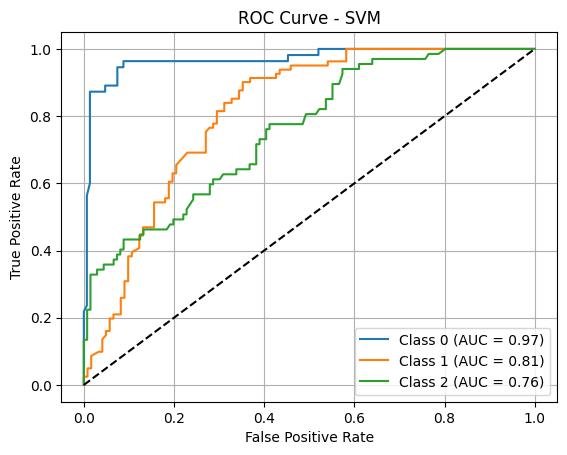

MODEL: KNN
Cross-Val Accuracy: 0.6818 ± 0.0512

Confusion Matrix:
[[41  6  8]
 [ 3 59 19]
 [ 3 28 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80        55
           1       0.63      0.73      0.68        81
           2       0.57      0.54      0.55        67

    accuracy                           0.67       203
   macro avg       0.69      0.67      0.68       203
weighted avg       0.68      0.67      0.67       203

AUC Score (holdout): 0.8562


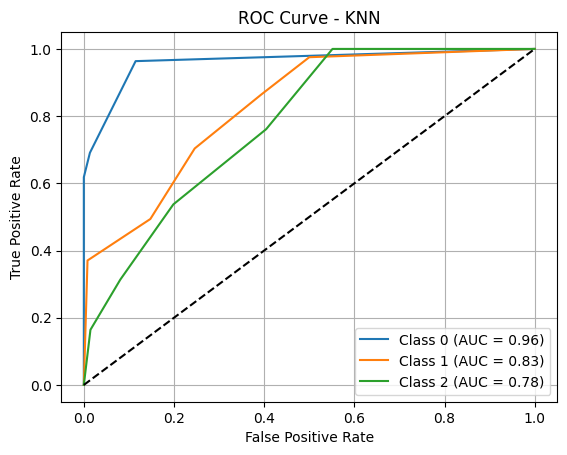

MODEL: Naive Bayes
Cross-Val Accuracy: 0.6054 ± 0.0318

Confusion Matrix:
[[39  3 13]
 [ 0 75  6]
 [ 3 53 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.71      0.80        55
           1       0.57      0.93      0.71        81
           2       0.37      0.16      0.23        67

    accuracy                           0.62       203
   macro avg       0.62      0.60      0.58       203
weighted avg       0.60      0.62      0.58       203

AUC Score (holdout): 0.7929


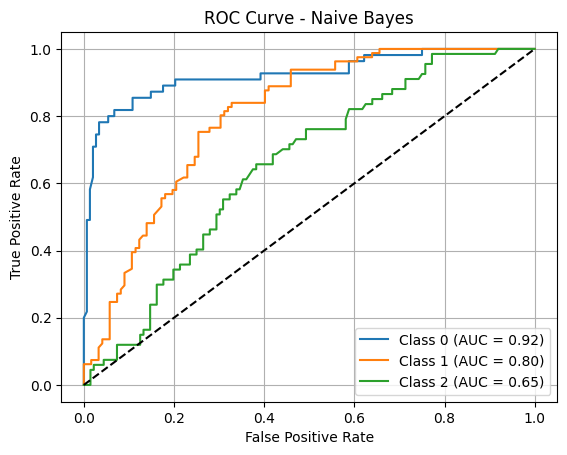

MODEL: Decision Tree
Cross-Val Accuracy: 0.8003 ± 0.0258

Confusion Matrix:
[[50  0  5]
 [ 0 61 20]
 [ 2  6 59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        55
           1       0.91      0.75      0.82        81
           2       0.70      0.88      0.78        67

    accuracy                           0.84       203
   macro avg       0.86      0.85      0.85       203
weighted avg       0.86      0.84      0.84       203

AUC Score (holdout): 0.9196


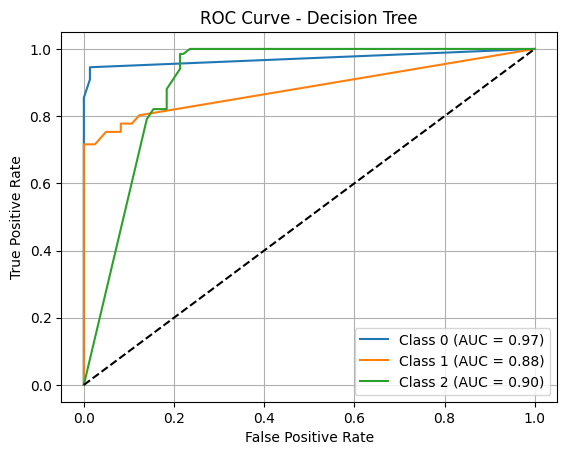

MODEL: ANN


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-Val Accuracy: 0.7053 ± 0.0169


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Confusion Matrix:
[[47  4  4]
 [ 1 69 11]
 [ 4 36 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        55
           1       0.63      0.85      0.73        81
           2       0.64      0.40      0.50        67

    accuracy                           0.70       203
   macro avg       0.73      0.70      0.70       203
weighted avg       0.71      0.70      0.69       203

AUC Score (holdout): 0.8465


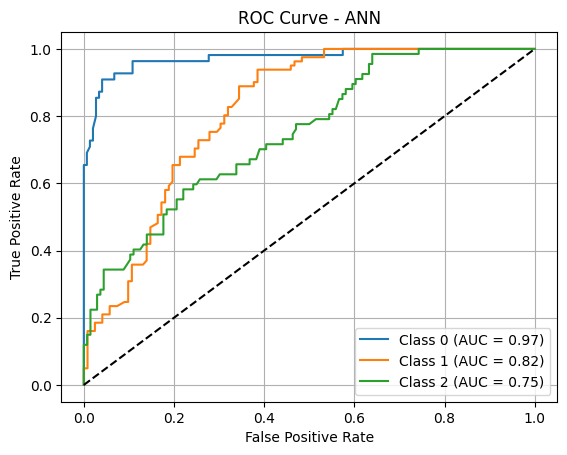

In [ ]:
for name, model in models.items():
    print("=" * 60)
    print(f"MODEL: {name}")

    # Melakukan validasi silang untuk mengukur performa model pada data latih
    # Dengan stratified k-fold agar proporsi kelas tetap terjaga
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"Cross-Val Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Melatih model menggunakan seluruh data latih
    model.fit(X_train, y_train)
    # Memprediksi kelas pada data uji
    y_pred = model.predict(X_test)
    # Menghitung probabilitas prediksi untuk masing-masing kelas (dibutuhkan untuk ROC)
    y_proba = model.predict_proba(X_test)

    # Menampilkan matriks kebingungan untuk melihat detail prediksi benar dan salah
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Menampilkan laporan klasifikasi yang mencakup precision, recall, dan F1-score tiap kelas
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Menghitung skor AUC secara keseluruhan untuk model dengan pendekatan multi-kelas one-vs-rest
    auc_score = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
    print(f"AUC Score (holdout): {auc_score:.4f}")

    # Persiapan data untuk menggambar ROC Curve per kelas
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(3):
        # Menghitung False Positive Rate dan True Positive Rate per kelas
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        # Menghitung area di bawah kurva ROC (AUC) untuk mengukur performa tiap kelas
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for j in range(3):
        # Menggambar kurva ROC untuk setiap kelas lengkap dengan nilai AUC pada legend
        plt.plot(fpr[j], tpr[j], label=f'Class {j} (AUC = {roc_auc[j]:.2f})')

    # Menampilkan garis diagonal sebagai acuan performa tebakan acak
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()